Process for prepping a SafeGraph zip file:

In [1]:
from zipfile import ZipFile
from pathlib import Path
from gzip import GzipFile
import pandas as pd
import geopandas as gpd

We can read zip file contents without extracting the actual files to disk using [ZipFile.open](https://docs.python.org/3/library/zipfile.html#zipfile.ZipFile.open). This particular zip file contains the data we want inside of gzipped CSV file inside of another nested zip file. So, we can read the gzipped file as well with a [GzipFile](https://docs.python.org/3/library/gzip.html#gzip.GzipFile) object.

In [2]:
zipfile_path = Path('/home/mjumbewu/Code/musa/musa-509/data/SafeGraph Data Purchase Aug-31-2021.zip')

with ZipFile(zipfile_path.open(mode='rb')) as safegraph_multi_zipfile:
    with ZipFile(safegraph_multi_zipfile.open('PA-CORE_POI-PATTERNS-2021_07-2021-09-01.zip')) as safegraph_july_zipfile:
        with GzipFile(fileobj=safegraph_july_zipfile.open('core_poi-patterns.csv.gz')) as patterns_csv_file:
            safegraph_patterns_df = pd.read_csv(patterns_csv_file)

safegraph_patterns_df.head()

,placekey,parent_placekey,location_name,safegraph_brand_ids,brands,top_category,sub_category,category_tags,naics_code,latitude,...,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,poi_cbg,visitor_home_aggregation,visitor_daytime_cbgs
0,223-222@628-pg4-mx5,NaN,GameStop,SG_BRAND_548fcc570f3cdce01c20a3c8f1e624f6,GameStop,"Sporting Goods, Hobby, and Musical Instrument ...","Hobby, Toy, and Game Stores",NaN,451120,40.043580,...,10.0,"{""<5"":13,""5-10"":166,""11-20"":47,""21-60"":62,""61-...","{""McDonald's"":6,""The Fresh Grocer"":6,""Sunoco"":...","{""Wawa"":60,""Dunkin'"":57,""Sunoco"":50,""Rite Aid""...","[5,5,6,7,4,4,4,8,19,45,24,30,48,45,35,30,35,29...","{""Monday"":32,""Tuesday"":36,""Wednesday"":35,""Thur...","{""android"":124,""ios"":86}",4.210102e+11,"{""421010248002"":9,""421010247004"":8,""4210102430...","{""421010279022"":9,""421010248002"":6,""4210102790..."
1,zzw-225@628-p9q-y9z,zzw-222@628-p9q-y5f,Akumin,SG_BRAND_91e839a055cb35a22625cbce214ad769,Akumin,Medical and Diagnostic Laboratories,Diagnostic Imaging Centers,NaN,621512,40.087443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,222-222@628-pg6-835,NaN,Philadelphia Cricket Club,NaN,NaN,Other Schools and Instruction,Sports and Recreation Instruction,NaN,611620,40.064704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,223-222@628-pgj-9zz,NaN,Sunny Restaurant,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,NaN,722511,39.989341,...,29.0,"{""<5"":18,""5-10"":155,""11-20"":125,""21-60"":204,""6...","{""Wawa"":1,""Sunoco"":1,""McDonald's"":1,""Walmart"":...","{""Sunoco"":6,""Dunkin'"":6,""Wawa"":5,""McDonald's"":...","[72,51,33,30,35,36,36,36,41,38,38,34,44,36,40,...","{""Monday"":68,""Tuesday"":115,""Wednesday"":103,""Th...","{""android"":328,""ios"":142}",4.210102e+11,"{""421010168004"":57,""421010167013"":15,""42101980...","{""421010168004"":13,""421010168001"":7,""421010252..."
4,222-222@628-pp2-nt9,NaN,Mattress Firm,SG_BRAND_4b3b04f953d9c06053aba73ef4672702,Mattress Firm,Furniture Stores,Furniture Stores,NaN,442110,39.994415,...,25.0,"{""<5"":1,""5-10"":27,""11-20"":19,""21-60"":44,""61-12...","{""Dunkin'"":14,""Wawa"":13,""Walmart"":10,""McDonald...","{""Wawa"":68,""Dunkin'"":59,""Walmart"":53,""McDonald...","[1,0,0,0,0,0,1,3,9,20,17,20,25,16,24,27,18,12,...","{""Monday"":8,""Tuesday"":11,""Wednesday"":22,""Thurs...","{""android"":63,""ios"":30}",4.210104e+11,"{""421010382001"":6,""421010175005"":4,""4210102810...","{""421010180012"":8,""421010298001"":5,""4210101920..."


In [3]:
# Using https://geopandas.org/gallery/create_geopandas_from_pandas.html as a reference for how to
# create a GeoDataFrame from a DataFrame with coords.
df = safegraph_patterns_df
safegraph_patterns_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
safegraph_patterns_gdf.head()

,placekey,parent_placekey,location_name,safegraph_brand_ids,brands,top_category,sub_category,category_tags,naics_code,latitude,...,bucketed_dwell_times,related_same_day_brand,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,poi_cbg,visitor_home_aggregation,visitor_daytime_cbgs,geometry
0,223-222@628-pg4-mx5,NaN,GameStop,SG_BRAND_548fcc570f3cdce01c20a3c8f1e624f6,GameStop,"Sporting Goods, Hobby, and Musical Instrument ...","Hobby, Toy, and Game Stores",NaN,451120,40.043580,...,"{""<5"":13,""5-10"":166,""11-20"":47,""21-60"":62,""61-...","{""McDonald's"":6,""The Fresh Grocer"":6,""Sunoco"":...","{""Wawa"":60,""Dunkin'"":57,""Sunoco"":50,""Rite Aid""...","[5,5,6,7,4,4,4,8,19,45,24,30,48,45,35,30,35,29...","{""Monday"":32,""Tuesday"":36,""Wednesday"":35,""Thur...","{""android"":124,""ios"":86}",4.210102e+11,"{""421010248002"":9,""421010247004"":8,""4210102430...","{""421010279022"":9,""421010248002"":6,""4210102790...",POINT (-75.15945 40.04358)
1,zzw-225@628-p9q-y9z,zzw-222@628-p9q-y5f,Akumin,SG_BRAND_91e839a055cb35a22625cbce214ad769,Akumin,Medical and Diagnostic Laboratories,Diagnostic Imaging Centers,NaN,621512,40.087443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.03989 40.08744)
2,222-222@628-pg6-835,NaN,Philadelphia Cricket Club,NaN,NaN,Other Schools and Instruction,Sports and Recreation Instruction,NaN,611620,40.064704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-75.20919 40.06470)
3,223-222@628-pgj-9zz,NaN,Sunny Restaurant,NaN,NaN,Restaurants and Other Eating Places,Full-Service Restaurants,NaN,722511,39.989341,...,"{""<5"":18,""5-10"":155,""11-20"":125,""21-60"":204,""6...","{""Wawa"":1,""Sunoco"":1,""McDonald's"":1,""Walmart"":...","{""Sunoco"":6,""Dunkin'"":6,""Wawa"":5,""McDonald's"":...","[72,51,33,30,35,36,36,36,41,38,38,34,44,36,40,...","{""Monday"":68,""Tuesday"":115,""Wednesday"":103,""Th...","{""android"":328,""ios"":142}",4.210102e+11,"{""421010168004"":57,""421010167013"":15,""42101980...","{""421010168004"":13,""421010168001"":7,""421010252...",POINT (-75.16647 39.98934)
4,222-222@628-pp2-nt9,NaN,Mattress Firm,SG_BRAND_4b3b04f953d9c06053aba73ef4672702,Mattress Firm,Furniture Stores,Furniture Stores,NaN,442110,39.994415,...,"{""<5"":1,""5-10"":27,""11-20"":19,""21-60"":44,""61-12...","{""Dunkin'"":14,""Wawa"":13,""Walmart"":10,""McDonald...","{""Wawa"":68,""Dunkin'"":59,""Walmart"":53,""McDonald...","[1,0,0,0,0,0,1,3,9,20,17,20,25,16,24,27,18,12,...","{""Monday"":8,""Tuesday"":11,""Wednesday"":22,""Thurs...","{""android"":63,""ios"":30}",4.210104e+11,"{""421010382001"":6,""421010175005"":4,""4210102810...","{""421010180012"":8,""421010298001"":5,""4210101920...",POINT (-75.09558 39.99441)


<AxesSubplot:>

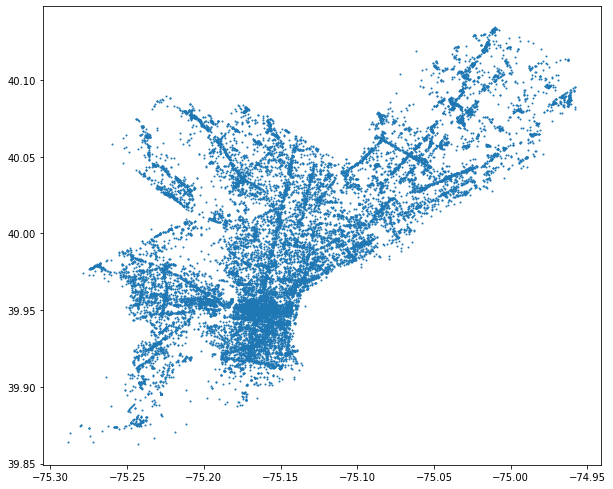

In [4]:
# Using https://geopandas.org/docs/user_guide/mapping.html as a reference for quickly mapping some
# geodataframe data.
gdf = safegraph_patterns_gdf
gdf[(gdf.latitude < 40.2) & (gdf.longitude > -75.4)].plot(figsize=(10, 10), markersize=1)

## So how does this square with commercial corridors?

In [5]:
corridors_gdf = gpd.read_file('/home/mjumbewu/Code/musa/musa-509/data/phl_commercial_corridors.geojson')
corridors_gdf.head()

,OBJECTID,PCPC_NUM,GLOBALID,NAME,P_DIST,ST_EXT,PT_ADD,ZIP,SURVEY_YEAR,GLA,...,FY12_15_SBP_CITY,FY12_15_SBP_TOTAL,FY16_19_SBP_CITY,FY16_19_SBP_TOTAL,FY08_11_PD,FY12_15_PD,FY16_19_PD,Shape__Area,Shape__Length,geometry
0,1,151,69c84823-37fa-4d2a-b8af-08a0ff7006eb,2nd and Fairmount,Central,I953rd/Laurel to Green,725 N. Second Street,19123.0,2012.0,"130,000",...,NaN,NaN,NaN,NaN,None,None,None,182959.941406,1989.157102,"POLYGON ((-75.14093 39.96085, -75.14056 39.961..."
1,2,152,d5cd06ce-0734-4f27-923e-7fd5e4da2865,2nd and Girard,Central,HowardLawrence/ThompsonLaurel,1100 N. Second Street,19123.0,2012.0,"270,000",...,NaN,NaN,NaN,NaN,None,None,None,348399.437500,3265.154024,"POLYGON ((-75.13713 39.96950, -75.13768 39.969..."
2,3,154,c46b6353-b607-44a6-bab7-e9890b5b5b83,6th and Germantown,Lower North,5th6th/SusquehannaBerks,2000 Germantown Avenue,19122.0,2012.0,"84,000",...,NaN,NaN,NaN,NaN,None,None,None,65351.101562,1445.681866,"POLYGON ((-75.14405 39.98373, -75.14417 39.983..."
3,4,179,e4acb303-210d-474f-86af-218713963033,"Broad, Lehigh, & Glenwood",North,13th16th/TorontoYork,2701 N. Broad Street,19132.0,2016.0,"183,000",...,NaN,NaN,NaN,NaN,None,None,None,457349.222656,5353.321502,"POLYGON ((-75.15518 39.98932, -75.15509 39.989..."
4,5,180,f8999bba-1c3e-49db-bdff-efd54dffec22,Germantown and Lehigh,Lower North,7th12th/CambriaCumberland,2649 Germantown Avenue,19133.0,2016.0,"255,000",...,NaN,4428853.5,NaN,NaN,PCPC Economic Dev Strategic Plan,None,None,214813.550781,3906.473825,"POLYGON ((-75.14693 39.98915, -75.14685 39.989..."


So there are districts defined. Let's see what all the values are.

In [6]:
corridors_gdf.P_DIST.unique()

array(['Central', 'Lower North', 'North', 'West Park', 'South',
       'Lower NW', 'Lower NE', 'Central NE', 'University SW', 'West',
       'N Delaware', 'Lower SW', 'River Wards', 'Lower South',
       'Lower Far NE', 'Upper Far NE', 'Upper NW', 'Upper North', None],
      dtype=object)

Those seem fairly well-defined. By searching OpenDataPhilly for "districts" I find a "Planning Districts" dataset with 18 defined district. This is likely my "P_DIST" values. But some are un-categorized. Let's check it out:

In [7]:
gdf = corridors_gdf
gdf[gdf.P_DIST.isna()]

,OBJECTID,PCPC_NUM,GLOBALID,NAME,P_DIST,ST_EXT,PT_ADD,ZIP,SURVEY_YEAR,GLA,...,FY12_15_SBP_CITY,FY12_15_SBP_TOTAL,FY16_19_SBP_CITY,FY16_19_SBP_TOTAL,FY08_11_PD,FY12_15_PD,FY16_19_PD,Shape__Area,Shape__Length,geometry
266,267,163,b5844336-132f-4b74-888d-c0bcf0b99c7b,31st and Norris,None,None,None,NaN,NaN,None,...,NaN,NaN,NaN,NaN,None,None,None,34897.75,1123.985737,"POLYGON ((-75.18481 39.98529, -75.18446 39.985..."


In [8]:
gdf = corridors_gdf
gdf[gdf.P_DIST.isna()].explore()

This looks like it's likely just an omission. Should be Central district or something. May have to deal with it manually in a transform.

<AxesSubplot:>

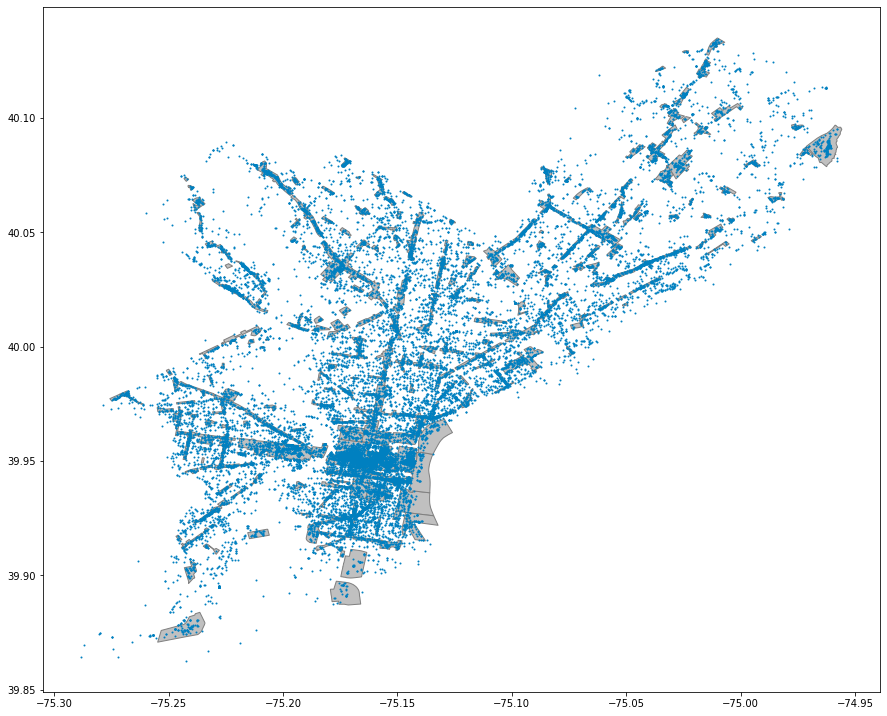

In [9]:
# Using https://geopandas.org/docs/user_guide/mapping.html#maps-with-layers as a reference for a multi-layer map
base = corridors_gdf.plot(color='silver', edgecolor='grey', figsize=(15, 15))

gdf = safegraph_patterns_gdf
gdf[(gdf.latitude < 40.2) & (gdf.longitude > -75.4)].plot(ax=base, color='#0080c0', markersize=1)

In [ ]:
gdf = safegraph_patterns_gdf
gdf[(gdf.latitude < 40.2) & (gdf.longitude > -75.4)].explore()